# AIML Unsupervised Learning Assignment 1
## Student Id: 2021AIML064
## Student Name: Jagadish Yalla

PGP AI/ML UNSUPERVISED LEARNING
ASSIGNMENT 1 [Weightage: 6%]
Consider the attached dataset of Credit Card which has the following fields:     
● CUSTID : Identification of Credit Card holder (Categorical)  
● BALANCE : Balance amount left in their account to make purchases (  
● BALANCEFREQUENCY : How frequently the Balance is updated, score between 0 and 1 (1 = frequently updated, 0 = not frequently updated)   
● PURCHASES : Amount of purchases made from account    
● ONEOFFPURCHASES : Maximum purchase amount done in one-go      
● INSTALLMENTSPURCHASES : Amount of purchase done in installment  
● CASHADVANCE : Cash in advance given by the user               
● PURCHASESFREQUENCY : How frequently the Purchases are being made, score    
between 0 and 1 (1 = frequently purchased, 0 = not frequently purchased)   
● ONEOFFPURCHASESFREQUENCY : How frequently Purchases are happening in one-go (1 = frequently purchased, 0 = not frequently purchased)   
● PURCHASESINSTALLMENTSFREQUENCY : How frequently purchases in installments   are being done (1 = frequently done, 0 = not frequently done)    
● CASHADVANCEFREQUENCY : How frequently the cash in advance being paid   
● CASHADVANCETRX : Number of Transactions made with "Cash in Advanced"  
● PURCHASESTRX : Numbe of purchase transactions made   
● CREDITLIMIT : Limit of Credit Card for user   
● PAYMENTS : Amount of Payment done by user    
● MINIMUM_PAYMENTS : Minimum amount of payments made by user  
● PRCFULLPAYMENT : Percent of full payment paid by user    
● TENURE : Tenure of credit card service for user   

Questions:
Notes: Write all code related to this assignment in a single jupyter notebook. Implement
K-means algorithm from scratch, do not use any predefined ML library function for K-means
algorithm. Marks will be deducted if any library function is used for KMeans. Use a single word
document to answer questions. Do not unnecessarily leave the print statements in your final
submitted notebook.
1. Given that K-means depends on distance metric, it is a convention to normalize the data
attributes so that attributes are on the same scale. So, in this first task, normalize all data
attributes. [0.5 mark]
2. Write your own code for the K-means algorithm using only two attributes, PURCHASES and
CREDITLIMIT. Take K=2. Plot clusters on a scatter plot with X and Y being the two attributes.
Color data points belonging to the first cluster with red and the second cluster with blue. Copy
the plot diagram in the word document and interpret the output. [1.5 marks]
3. Redo question-2 on different values of K = 3,4,5. For each case, draw the plot of clusters as
stated above. Visualize these plots, copy the plot diagrams in the word document, and comment
on which is better clustering (and reasons) based on visualization only. [1.5 marks]
4. Use the code written by you to cluster the data using all the features in the dataset. Take k=5
for this. [1.5 marks]5. Write a few lines as comments in the notebook about the interpretation of
the best clusters obtained.
Also write a few statements about how these clusters can be useful. [1 mark]
Deliverables:
One jupyter notebook for Q 1,2,3,4
One word document for Q 2,3,4,5

In [1]:
# Import libraries
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt # for Data visualization
%matplotlib inline

**Read the dataset**

In [2]:
# Read data from csv file
df = pd.read_csv('CC GENERAL.csv')
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [3]:
print("Row and column counts in ccgeneral.csv: ",df.shape)

Row and column counts in ccgeneral.csv:  (8950, 18)


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [5]:
# Get statistics around the dataset
df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


**Lookout for missing values**

In [6]:
df.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

## Handling missing values

In [7]:
df['MINIMUM_PAYMENTS'].fillna((df['MINIMUM_PAYMENTS'].mean()), inplace=True)
df['CREDIT_LIMIT'].fillna((df['CREDIT_LIMIT'].mean()), inplace=True)
df.isnull().sum()

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

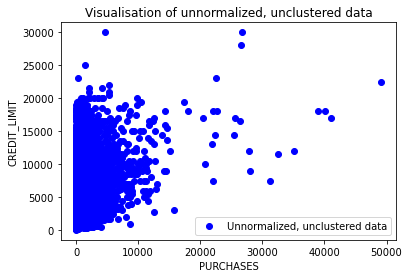

In [9]:
df.columns = df.columns.str.strip()
# Plot the values
f1 = df['PURCHASES'].values
f2 = df['CREDIT_LIMIT'].values

plt.scatter(f1, f2,c='blue',label='Unnormalized, unclustered data')
plt.title('Visualisation of unnormalized, unclustered data')
plt.xlabel('PURCHASES')
plt.ylabel('CREDIT_LIMIT')
plt.legend()
plt.show()

### 1.Normalize all data attributes

In [10]:
# Normalize the numeric attributes using min, max normailzation (range 0 to 1). 
# K-means is based on distance measures and hence needs to have the attrbutes at the same scale.
df_numeric = df.drop(['CUST_ID'], axis='columns')

df_norm = ((df_numeric-df_numeric.min())/(df_numeric.max() - df_numeric.min()))
df_norm.insert(0, 'CUST_ID', df['CUST_ID'] )

df_norm.head()


,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,0.002148,0.818182,0.001945,0.000000,0.00424,0.000000,0.166667,0.000000,0.083333,0.000000,0.00000,0.005587,0.031720,0.003979,0.001826,0.000000,1.0
1,C10002,0.168169,0.909091,0.000000,0.000000,0.00000,0.136685,0.000000,0.000000,0.000000,0.166667,0.03252,0.000000,0.232053,0.080893,0.014034,0.222222,1.0
2,C10003,0.131026,1.000000,0.015766,0.018968,0.00000,0.000000,1.000000,1.000000,0.000000,0.000000,0.00000,0.033520,0.248748,0.012264,0.008210,0.000000,1.0
3,C10004,0.087521,0.636364,0.030567,0.036775,0.00000,0.004366,0.083333,0.083333,0.000000,0.055555,0.00813,0.002793,0.248748,0.000000,0.011310,0.000000,1.0
4,C10005,0.042940,1.000000,0.000326,0.000393,0.00000,0.000000,0.083333,0.083333,0.000000,0.000000,0.00000,0.002793,0.038397,0.013374,0.003204,0.000000,1.0


In [11]:
# Get statistics around the normalized attributes
df_norm.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000
mean,0.082154,0.877271,0.020457,0.014534,0.018270,0.020766,0.490351,0.202458,0.364437,0.090096,0.026413,0.041089,0.148396,0.034170,0.011310,0.153715,0.919553
std,0.109306,0.236904,0.043570,0.040722,0.040193,0.044491,0.401371,0.298336,0.397448,0.133414,0.055485,0.069435,0.121490,0.057078,0.030503,0.292499,0.223055
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.006736,0.888889,0.000808,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,0.002793,0.051753,0.007556,0.002236,0.000000,1.000000
50%,0.045864,1.000000,0.007367,0.000932,0.003956,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,0.019553,0.098497,0.016894,0.004392,0.000000,1.000000
75%,0.107868,1.000000,0.022637,0.014166,0.020828,0.023629,0.916667,0.300000,0.750000,0.148148,0.032520,0.047486,0.215359,0.037482,0.011310,0.142857,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


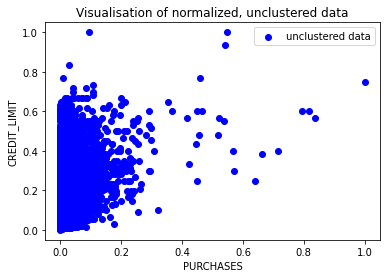

In [12]:
df_norm.columns = df_norm.columns.str.strip()

# Plot the values
X = df_norm['PURCHASES'].values
Y = df_norm['CREDIT_LIMIT'].values

plt.title('Visualisation of Data')
plt.scatter(X, Y,c='blue',label='unclustered data')
plt.xlabel('PURCHASES')
plt.ylabel('CREDIT_LIMIT')
plt.legend()
plt.title('Visualisation of normalized, unclustered data')
plt.show()

### 2. K-means algorithm using two attributes namely PURCHASES and CREDIT_LIMIT

In [13]:
# 1. Ramdomly initialize K centriods
# Repeat until converge
#  2.1 For each datapoint, compute euclidian distance from centroid and assign the cluster based on the minimal distance
#  2.2 Compute mean of the clusters and assign new centroids
def K_Means(K, X, iter = 20):
    
    N, D = X.shape  # N = number of rows. D = number of attributes
    import random
        # Initialize centriods
    centroids = np.array([]).reshape(D, 0)
    for i in range(K):
        rand = random.randint(0, N-1)
        centroids = np.c_[centroids, X[rand]]
        
    # Directory to hold cluster as key and constituent datapoints as values
    global dir_clusters
    dir_clusters = {}    
        
        
    for i in range(iter):       

        # For each datapoint, compute euclidian distance from centroid and assign the cluster based on the minimal distance    
        distance = np.array([]).reshape(N, 0)
        for k in range(K):
                temp_dist = np.sum((X - centroids[:, k])**2, axis = 1) # Euclidian distance
                distance = np.c_[distance, temp_dist]

        # Store nearest centroid in a array
        nearest_centroid = np.argmin(distance, axis=1) + 1

        # Temp dictionary to hold cluster as key and constituent datapoints as values
        temp_clusters = {}

        for k in range(K):
            temp_clusters[k + 1] = np.array([]).reshape(D, 0)

        for i in range(N):
            temp_clusters[nearest_centroid[i]] = np.c_[temp_clusters[nearest_centroid[i]], X[i]]

        for k in range(K):
            temp_clusters[k +1 ] = temp_clusters[k + 1].T

        # Compute mean of the clusters and assign new centroids
        for k in range(K):
            centroids[:, k] = np.mean(temp_clusters[k + 1], axis = 0)
  
            
        dir_clusters = temp_clusters
                
         
    return (dir_clusters, centroids)    

**K = 2**
<BR/>Take K=2. Plot clusters on a scatter plot with X and Y being the two attributes namely purchases and credit_limit, respectively. Color data points belonging to the first cluster with red and the second cluster with blue.

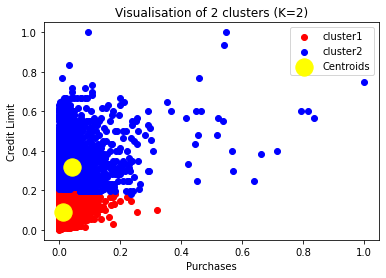

In [14]:
K = 2
X =  df_norm[['PURCHASES', 'CREDIT_LIMIT']].values

# call K_Mean to get a dictionary of clusters
output, centroids = K_Means(K, X)

color = ['red', 'blue']
labels = ['cluster1','cluster2']

for k in range(K):
    plt.scatter(output[k + 1][:, 0], output[k + 1][:, 1], c = color[k], label = labels[k])  
    
plt.scatter(centroids[0,:], centroids[1,:], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Visualisation of 2 clusters (K=2)')
plt.xlabel('Purchases')
plt.ylabel('Credit Limit')
plt.legend()
plt.show()

In [15]:
print(f'percentage of points in cluster1:  {len(list(dir_clusters.values())[0])/8950}')
print(f'percentage of points in cluster2:  {len(list(dir_clusters.values())[1])/8950}')


percentage of points in cluster1:  0.7420111731843575
percentage of points in cluster2:  0.25798882681564245


### 3. K-means algorithm using two attributes namely Purchases and Credit Limit
**Redo question-2 on different values of K = 3,4,5. For each case, draw the plot of clusters as
stated above. Visualize these plots, copy the plot diagrams in the word document, and comment
on which is better clustering (and reasons) based on visualization only**

**for K=3**

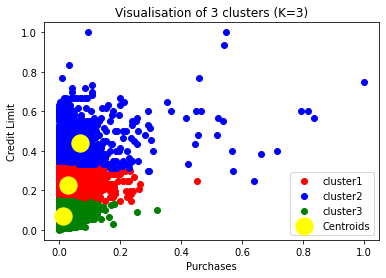

In [16]:
K = 3
X =  df_norm[['PURCHASES', 'CREDIT_LIMIT']].values

# call K_Mean to get a dictionary of clusters
output, centroids = K_Means(K, X)

color=['red', 'blue', 'green']
labels=['cluster1','cluster2' ,'cluster3']

for k in range(K):
    plt.scatter(output[k + 1][:, 0], output[k + 1][:, 1], c = color[k], label = labels[k])  
    
plt.scatter(centroids[0,:], centroids[1,:], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Visualisation of 3 clusters (K=3)')
plt.xlabel('Purchases')
plt.ylabel('Credit Limit')
plt.legend()
plt.show()

In [17]:
print(f'percentage of  points in cluster1:  {len(list(dir_clusters.values())[0])/8950}')
print(f'percentage of points in cluster2:  {len(list(dir_clusters.values())[1])/8950}')
print(f'percentage of points in cluster3:  {len(list(dir_clusters.values())[2])/8950}')

percentage of  points in cluster1:  0.29441340782122905
percentage of points in cluster2:  0.0805586592178771
percentage of points in cluster3:  0.6250279329608939


**FOR K = 4**

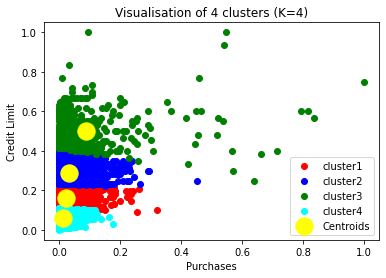

In [18]:
K = 4
X =  df_norm[['PURCHASES', 'CREDIT_LIMIT']].values

# call K_Mean to get a dictionary of clusters
output, centroids = K_Means(K, X)

color = ['red', 'blue', 'green', 'cyan']
labels = ['cluster1','cluster2' ,'cluster3', 'cluster4']

for k in range(K):
    plt.scatter(output[k + 1][:, 0], output[k + 1][:, 1], c = color[k], label = labels[k])  
    
plt.scatter(centroids[0,:], centroids[1,:], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Visualisation of 4 clusters (K=4)')
plt.xlabel('Purchases')
plt.ylabel('Credit Limit')
plt.legend()
plt.show()

In [19]:
print(f'percentage of points in cluster1:  {len(list(dir_clusters.values())[0])/ 8950}')
print(f'percentage of points in cluster2:  {len(list(dir_clusters.values())[1])/8950}')
print(f'percentage of points in cluster3:  {len(list(dir_clusters.values())[2])/ 8950}')
print(f'percentage of points in cluster4:  {len(list(dir_clusters.values())[3])/8950}')

percentage of points in cluster1:  0.2569832402234637
percentage of points in cluster2:  0.18156424581005587
percentage of points in cluster3:  0.044804469273743014
percentage of points in cluster4:  0.5166480446927374


**FOR K = 5**

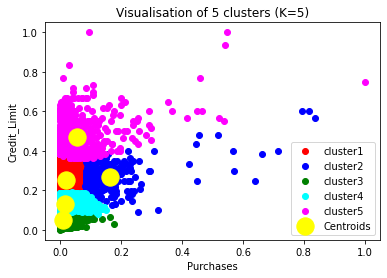

In [20]:
K = 5
X =  df_norm[['PURCHASES', 'CREDIT_LIMIT']].values

# call K_Mean to get a dictionary of clusters
output, centroids = K_Means(K, X)

color = ['red', 'blue', 'green', 'cyan', 'magenta']
labels = ['cluster1','cluster2' ,'cluster3', 'cluster4', 'cluster5']

for k in range(K):
    plt.scatter(output[k + 1][:, 0], output[k + 1][:, 1], c = color[k], label = labels[k])  
    
plt.scatter(centroids[0,:], centroids[1,:], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Visualisation of 5 clusters (K=5)')
plt.xlabel('Purchases')
plt.ylabel('Credit_Limit')
plt.legend()
plt.show()

In [21]:
print(f'percentage of points in cluster1:  {len(list(dir_clusters.values())[0])/8950}')
print(f'percentage of points in cluster2:  {len(list(dir_clusters.values())[1])/8950}')
print(f'percentage of points in cluster3:  {len(list(dir_clusters.values())[2])/8950}')
print(f'percentage of points in cluster4:  {len(list(dir_clusters.values())[3])/8950}')
print(f'percentage of points in cluster5:  {len(list(dir_clusters.values())[4])/8950}')

percentage of points in cluster1:  0.2217877094972067
percentage of points in cluster2:  0.027374301675977653
percentage of points in cluster3:  0.4194413407821229
percentage of points in cluster4:  0.2718435754189944
percentage of points in cluster5:  0.059553072625698325


###  4. Use the code written by you to cluster the data using all the features in the dataset. Take k=5 for this. [1.5 marks]

In [22]:
K = 5
df_numeric1 = df.drop(['CUST_ID'], axis='columns')
df_norm1 = ((df_numeric1-df_numeric1.min())/(df_numeric1.max() - df_numeric1.min()))
X =  df_norm1[['BALANCE','BALANCE_FREQUENCY','PURCHASES','ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT','PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE']].values


In [23]:
# Define KMeans for any number of input variables

# 1. Ramdomly initialize K centriods
# Repeat until converge
#  2.1 For each datapoint, compute euclidian distance from centroid and assign the cluster based on the minimal distance
#  2.2 Compute mean of the clusters and assign new centroids
def K_Means(K, X, iter = 40):
    
    N, D = X.shape  # N = number of rows. D = number of attributes
    import random
    # Initialize centriods
    global centroids
    centroids = np.array([]).reshape(D, 0)
    for i in range(K):
        rand = random.randint(0, N-1)
        centroids = np.c_[centroids, X[rand]]
      
    # Directory to hold cluster as key and constituent datapoints as values
    global dir_clusters
    dir_clusters = {}    
        
    for i in range(iter):       

        # For each datapoint, compute euclidian distance from centroid and assign the cluster based on the minimal distance    
        distance = np.array([]).reshape(N, 0)
        for k in range(K):
                temp_dist = np.sum((X - centroids[:, k])**2, axis = 1) # Euclidian distance
                distance = np.c_[distance, temp_dist]

        # Store nearest centroid in a array
        nearest_centroid = np.argmin(distance, axis=1) + 1

        # Temp dictionary to hold cluster as key and constituent datapoints as values
        temp_clusters = {}

        for k in range(K):
            temp_clusters[k + 1] = np.array([]).reshape(D, 0)

        for i in range(N):
            temp_clusters[nearest_centroid[i]] = np.c_[temp_clusters[nearest_centroid[i]], X[i]]

        for k in range(K):
            temp_clusters[k +1 ] = temp_clusters[k + 1].T

        # Compute mean of the clusters and assign new centroids
        for k in range(K):
            centroids[:, k] = np.mean(temp_clusters[k + 1], axis = 0)
            
        dir_clusters = temp_clusters
        
        
    return (dir_clusters, centroids)    


In [24]:
# call K_Mean to get a dictionary of clusters
output, centroids_ = K_Means(K, X)

In [25]:
centroids_

array([[0.06950822, 0.1169351 , 0.1002072 , 0.06253944, 0.00721172],
       [0.75921001, 0.97338826, 0.97710264, 0.93403317, 0.38703322],
       [0.00629694, 0.00609591, 0.06769598, 0.02244478, 0.00771844],
       [0.00632481, 0.00584771, 0.06051255, 0.00696219, 0.00597312],
       [0.00229021, 0.00270038, 0.03792066, 0.03633235, 0.00601345],
       [0.03765025, 0.03256148, 0.01330606, 0.01105628, 0.00955219],
       [0.19930831, 0.14088332, 0.90966498, 0.88972509, 0.22557281],
       [0.11404223, 0.08823722, 0.81220476, 0.10311376, 0.07427379],
       [0.0770529 , 0.0537328 , 0.50444475, 0.8403662 , 0.14304007],
       [0.17814771, 0.14282002, 0.05875912, 0.04870135, 0.02716178],
       [0.04146018, 0.04289127, 0.01799721, 0.01463601, 0.0079554 ],
       [0.00790692, 0.00794042, 0.12272455, 0.06045941, 0.01074056],
       [0.10389124, 0.14274607, 0.22556432, 0.13040228, 0.13336796],
       [0.01619475, 0.03067533, 0.06540417, 0.02822127, 0.02857748],
       [0.00638321, 0.01400395, 0.

In [26]:
print(f'percent points in cluster1:  {len(list(dir_clusters.values())[0])/ 8950}')
print(f'percent points in cluster2:  {len(list(dir_clusters.values())[1])/8950}')
print(f'percent points in cluster3:  {len(list(dir_clusters.values())[2])/ 8950}')
print(f'percent points in cluster4:  {len(list(dir_clusters.values())[3])/8950}')
print(f'percent points in cluster5:  {len(list(dir_clusters.values())[4])/8950}')

percent points in cluster1:  0.05608938547486034
percent points in cluster2:  0.3749720670391061
percent points in cluster3:  0.15217877094972068
percent points in cluster4:  0.29195530726256985
percent points in cluster5:  0.12480446927374302
